**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# *Using neural networks for music classification* 

## Abstract

This project implements a deep neural network model using Keras. We wanted to find out how well a neural network performs on high-dimensional data with minimal tuning. The same classifier was used for both accuracy and logarithmic loss.

## 1. Introduction

*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*

Building a classifier nowadays is easier than ever, though building a good classifier is still a hard task despite the high availability of efficient tools created for this purpose. We wanted to investigate the performance of a minimally-tuned neural network in classification using out-of-the-box libraries. We chose Keras because of its popularity and documentation availability.

The data usually has many problems some of which cannot be known beforehand. Preprocessing and visualisation are necessary for building a proper model. However, data analysis is already quite ubiquitous and the need for better tools is ever-growing. Some people, who would benefit from machine learning and data analysis, might not even be aware of the current progress of the field nor the tools at all. If these people were made aware of the field it will overall benefit the society we live in. To this day, it still requires a data scientist/engineer to build the models because of the various bottlenecks present in data science. 




## 2. Data analysis

*Briefly describe data (class distribution, dimensionality) and how will it affect
classification. Visualize the data. Don’t focus too much on the meaning of the features,
unless you want to.*

*- Include histograms showing class distribution.*

The supplied data contains 4363 labeled samples and 6544 unlabeled sample vectors. Every sample is a vector of length 264 which is composed of preprocessed properties of the original time-series data. There are 10 labels and the class distribution is unbalanced; almost half of the labeled samples have the same label which could lead to problems in classification. For example, we don't want the classifier to learn the class distribution of the training set because the class distribution might be completely different for the evaluation set. Some of the fields in the data contain almost identical values for the whole dataset which means these features cannot be used to differentiate samples. Some of the features may also be redundant and contribute nothing while having high variance amongst the dataset. 

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

The data can be loaded by creating a Preprocessor object:

In [19]:
dl = Preprocessor(balance=False, scale=False)
x_train, y_train, x_test, y_test = dl.divided_data(ratio=1, load_bal_data=False)

Plot the label distribution of the training data:

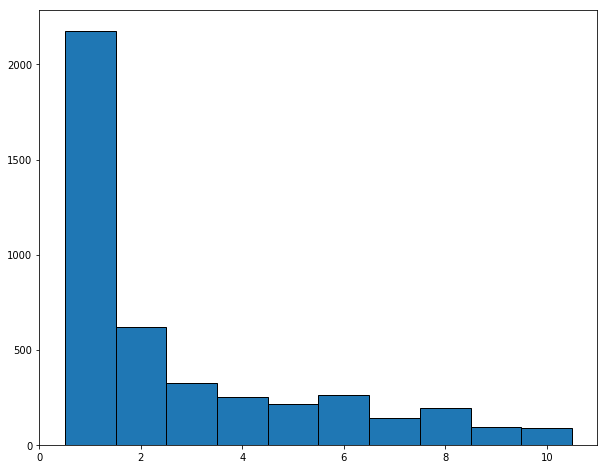

In [20]:
# plot label distribution in training data
plt.figure(1, figsize=(10, 8))
plt.hist(y_train, range=(0.5,10.5), bins=10, ec='black')
plt.show()

Here the class imbalance can be seen clearly.

## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*



In [4]:
# Trials with ML algorithms

## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*



In [5]:
#Confusion matrix ...

## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn import preprocessing

class Preprocessor:

	def __init__(self, path='data/', balance=True, mutation_rate=5e-2, scale=True):
		self.balance 		 = balance
		self.scale 			 = scale
		self.mutation_rate 	 = mutation_rate
		self.data_path 		 = path
		self.raw_data_labels = pd.read_csv(self.data_path + 'train_labels.csv', header=None)
		self.unique_labels	 = np.unique(self.raw_data_labels)
		self.raw_data 		 = self.load_raw_data('train_data.csv')
		self.test_data		 = self.load_raw_data('test_data.csv')

	def load_raw_data(self, file):
		data = pd.read_csv(self.data_path + file, header=None).values
		if self.scale:
			data = preprocessing.scale(data)
		return data

	def balance_raw_data(self, data, labels, save_bal_data, bal_data_path):
		distribution = {}
		raw = np.hstack((labels, data))
		for label in self.unique_labels:
			distribution[int(label)] = 0
		for label in labels:
			distribution[int(label)] += 1
		distmax = distribution[max(distribution, key=distribution.get)]
		amount = 0
		for key in distribution:
			amount += distmax - distribution[key]
		count = 0
		tmp = np.empty((0, 265))
		for label in self.unique_labels:
			auxiliary_rows = raw[raw[:, 0] == label]
			for _ in range(distmax - distribution[label]):
				to_add = auxiliary_rows[np.random.randint(auxiliary_rows.shape[0])]
				for elem in range(to_add.shape[0] - 1):
					rnd = np.random.uniform(1 - self.mutation_rate, 1 + self.mutation_rate)
					to_add[elem + 1] *= rnd
				count += 1
				if count % 1000 == 0:
					print("Processed count: ", count, "/", amount)
				tmp = np.append(tmp, [to_add], axis=0)
		raw = np.vstack((raw, tmp))
		# optionally saves the data
		# boolean save_bal_data and save path is given to class method 'divided_data()'
		if save_bal_data:
			pd.DataFrame(raw).to_csv(bal_data_path)
		new_labels = raw[:, :1]
		new_features = raw[:, 1:]
		return new_features, new_labels

	def label_filter(self, row, label: int):
		#print(int(row[0])
		return row[0] == label

	# loads all feature vectors from training data and validation data for unsupervised learning
	# shape: (num_of_vectors, 264)
	def all_feature_vectors(self):
		pass

	# transforms the label data to vectors, for example: 2 => (0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
	# shape: 
	def transformed_labels(self, data):
		unique_labels = np.unique(self.raw_data_labels)
		labels = np.zeros((data.shape[0], unique_labels.shape[0]))
		for i in range(data.shape[0]):
			labels[i][int(data[i]) - 1] = 1
		assert labels.shape == (data.shape[0], unique_labels.shape[0])
		return labels

	# normalises columns to [0.0, 1.0]
	def normalize_data(self, data):
		transformed = data
		print(type(data))
		return transformed

	# divides training data according to ratio for training purposes: (training_data, training_labels), (testing_data, testing_labels)
	# shape: (ratio*4263, col), ((1 - ratio)*4363, col)
	# loads preprocessed data from file or preprocesses the data and optionally saves to file
	def divided_data(self, ratio=0.5, bal_data_path=None, load_bal_data=True, save_bal_data=False):
		# path to balanced data file is used for both loading and saving the file
		if not bal_data_path:
			# appends ratio in percentages to file name
			bal_data_path = self.data_path + 'bal_data_ratio_' + str(int(100*ratio)) + '.csv'

		raw = np.hstack((self.raw_data_labels, self.raw_data))
		np.random.shuffle(raw)
		num = int(ratio * raw.shape[0])
		training_data = raw[:num, 1:]
		training_labels = raw[:num, :1]

		# balance the data
		if (self.balance and not load_bal_data):
			training_data, training_labels = self.balance_raw_data(training_data, training_labels, save_bal_data, bal_data_path)

		# use old balanced data file
		if (self.balance and load_bal_data):
			raw = pd.read_csv(bal_data_path, header=None).values
			# pandas puts headers as first column and row
			training_labels = raw[1:, 1:2]
			training_data = raw[1:, 2:]

		testing_data = raw[num:, 1:]
		testing_labels = raw[num:, :1]
		return training_data, training_labels, testing_data, testing_labels

	# returns columns (1-168)
	# shape: (row, 168)
	def get_rhythm_patterns(self, data):
		return data[:,0:168]

	# return columns (169-216)
	# shape: (row, 48)
	def get_chroma(self, data):
		return data[:,168:216]

	# return columns 217-264
	# shape: (row, 48)
	def get_mfcc(self, data):
		return data[:,216:]
